# **Section 1: Python + Machine Learning**

**Tasks:**

1. Load the dataset and perform data cleaning.
2. Perform EDA using visualizations (use seaborn, matplotlib).
3. Predict whether a student will pass or fail based on scores and other features.
4. Use Logistic Regression or Random Forest for classification.
5. Evaluate the model using accuracy, confusion matrix, F1-score.
6. Add comments/markdown to explain the steps.

# Load the dataset and perform data Cleaning

In [ ]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


# EDA

Visualizations are created using Seaborn and Matplotlib to explore the distributions of scores and categorical variables. Pair plots are used to examine relationships between different scores.

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

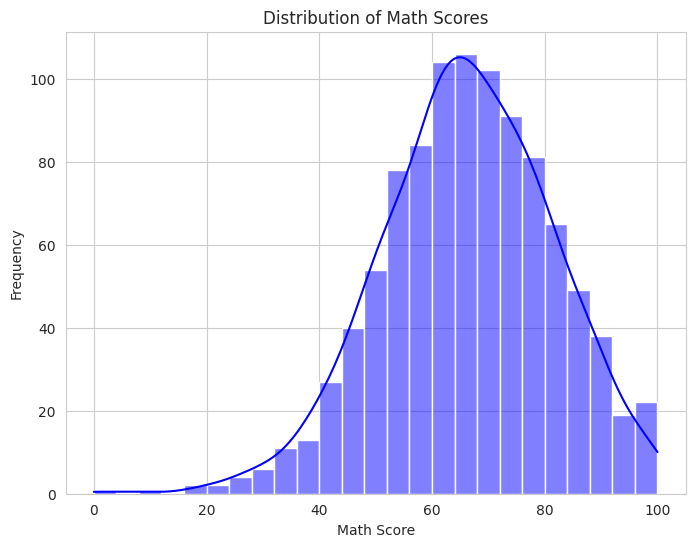

In [ ]:
# Distribution of math scores
plt.figure(figsize=(8, 6))
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

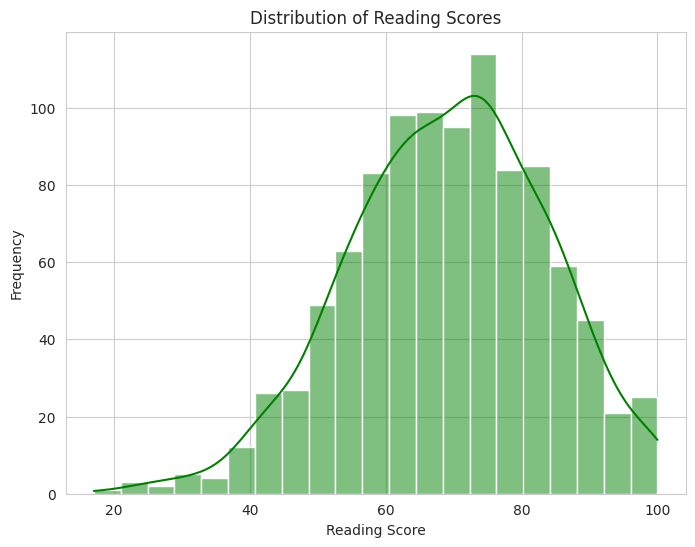

In [ ]:
# Distribution of reading scores
plt.figure(figsize=(8, 6))
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

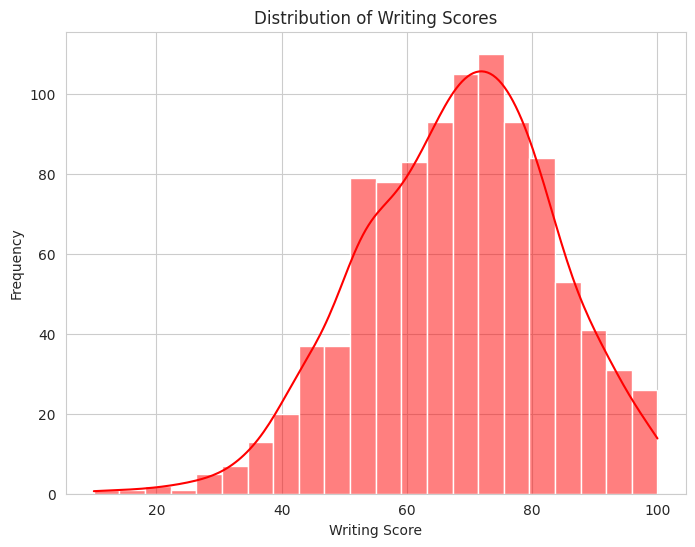

In [ ]:
# Distribution of writing scores
plt.figure(figsize=(8, 6))
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-14c51f1de56c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


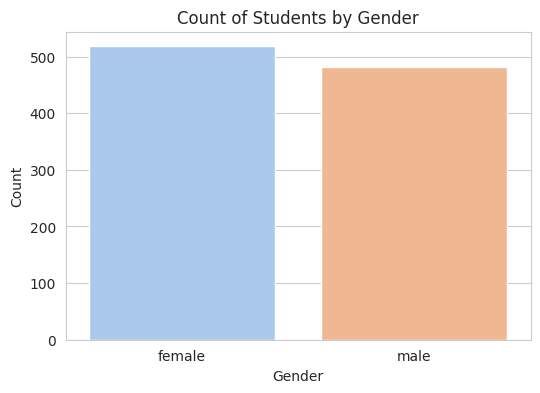

In [ ]:
# Count plot for gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-12-9ae4ff48ad3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education', data=df, palette='pastel')


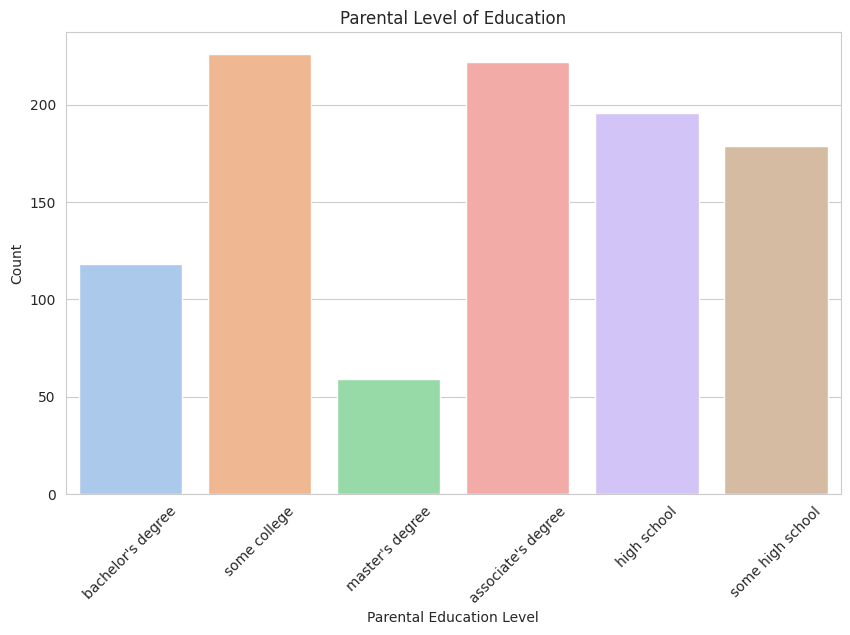

In [ ]:
# Count plot for parental level of education
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=df, palette='pastel')
plt.title('Parental Level of Education')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

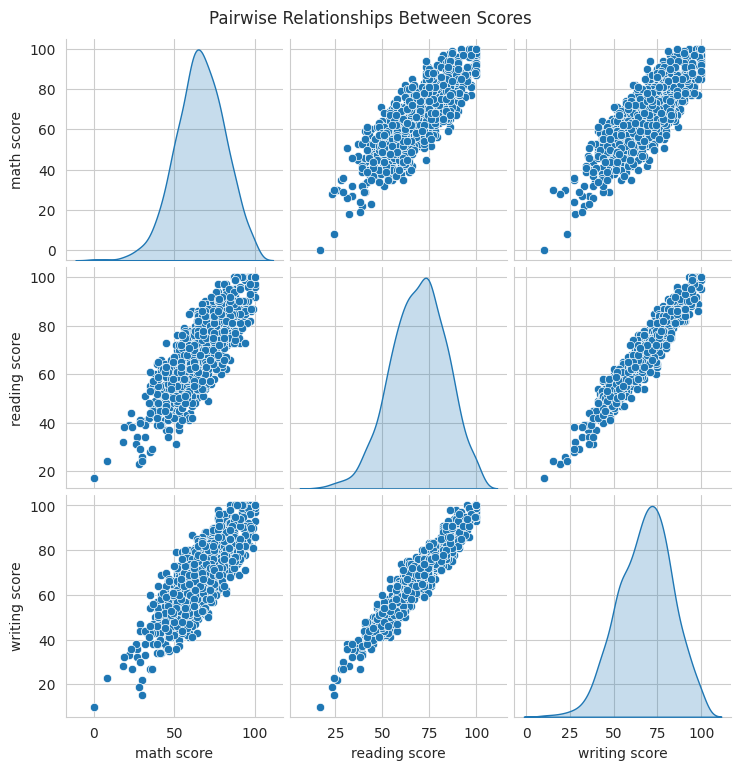

In [ ]:
# Pair plot to observe relationships between scores
sns.pairplot(df[['math score', 'reading score', 'writing score']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Scores', y=1.02)
plt.show()

# 'Pass/fail' based on average score

A new binary target variable 'pass/fail' is created based on the average score, with a threshold of 50 to determine passing.

In [ ]:
# Creating a new binary target variable 'pass/fail' based on average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass/fail'] = np.where(df['average score'] >= 50, 1, 0)

In [ ]:
# Selecting features and target variable
X = df.drop(columns=['math score', 'reading score', 'writing score', 'average score', 'pass/fail'])
y = df['pass/fail']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identifying categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Creating transformers for preprocessing
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numerical_transformer = StandardScaler()

In [ ]:
# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression Model

In [ ]:
# Creating and evaluating Logistic Regression model
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(max_iter=1000))])
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)

In [ ]:
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Model Evaluation:
Accuracy: 0.86
Confusion Matrix:
 [[  0  27]
 [  1 172]]
F1 Score: 0.9247311827956989

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



# Random Forest Model

In [ ]:
# Creating and evaluating Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.855
Confusion Matrix:
 [[  0  27]
 [  2 171]]
F1 Score: 0.921832884097035

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.85       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.75      0.85      0.80       200

